In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


### Importing Power Generation & Weather Sensor

In [ ]:
generation_data = pd.read_csv('/content/gdrive/MyDrive/Prediction/Plant_2_Generation_Data.csv')

In [ ]:
weather_data = pd.read_csv('/content/gdrive/MyDrive/Prediction/Plant_2_Weather_Sensor_Data.csv')

In [ ]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

In [ ]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

### Adjust datetime format

In [ ]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

### Merging generation data and weather sensor data

In [ ]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

### Adding separate time and date columns

In [ ]:
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(5)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   
2            27.004764           25.060789          0.0  2020-05-15  00:00:00   
3            27.004764           25.060789          0.0  2020-05-15  00:00:00   
4            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20     0        0                   0  2020-05-15  
1   15      5    20     0        0                   0  2020-05-15  
2   15      5    20     0        0                   0  2020-05-15  
3   15      5    20     0        0                   0  2020-05-15  
4   15      5    20     0        0                   0  2020-05-15

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [ ]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [ ]:
df_solar.describe().style.background_gradient(cmap='rainbow')

### Converting 'SOURCE_KEY' from categorical form to numerical form

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   
2            27.004764           25.060789          0.0  2020-05-15  00:00:00   
3            27.004764           25.060789          0.0  2020-05-15  00:00:00   
4            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5    20     0        0                   0  2020-05-15   
1   15      5    20     0        0                   0  2020-05-15   
2   15      5    20     0        0                   0  2020-05-15   
3   15      5    20     0        0                   0  2020-05-15   
4   15      5    20     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

### **Data Visualization:**

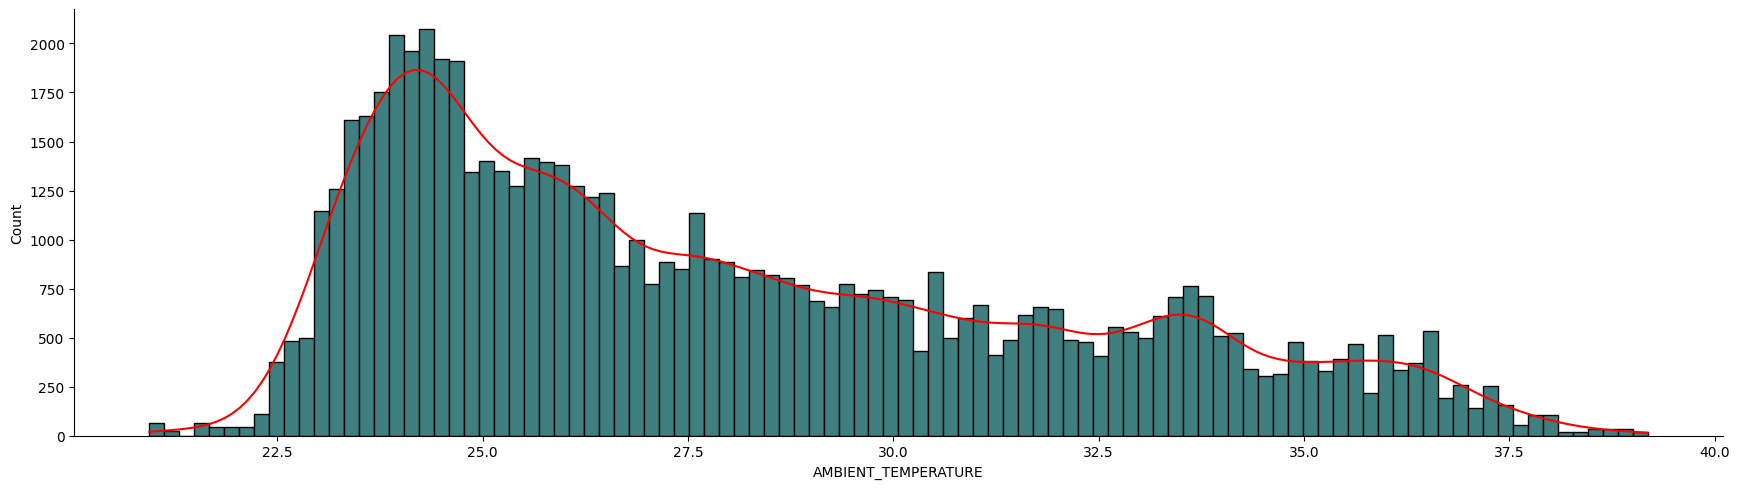

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [ ]:
df_solar['DATE'].nunique()

34

DC_POWER generation on per day basis.

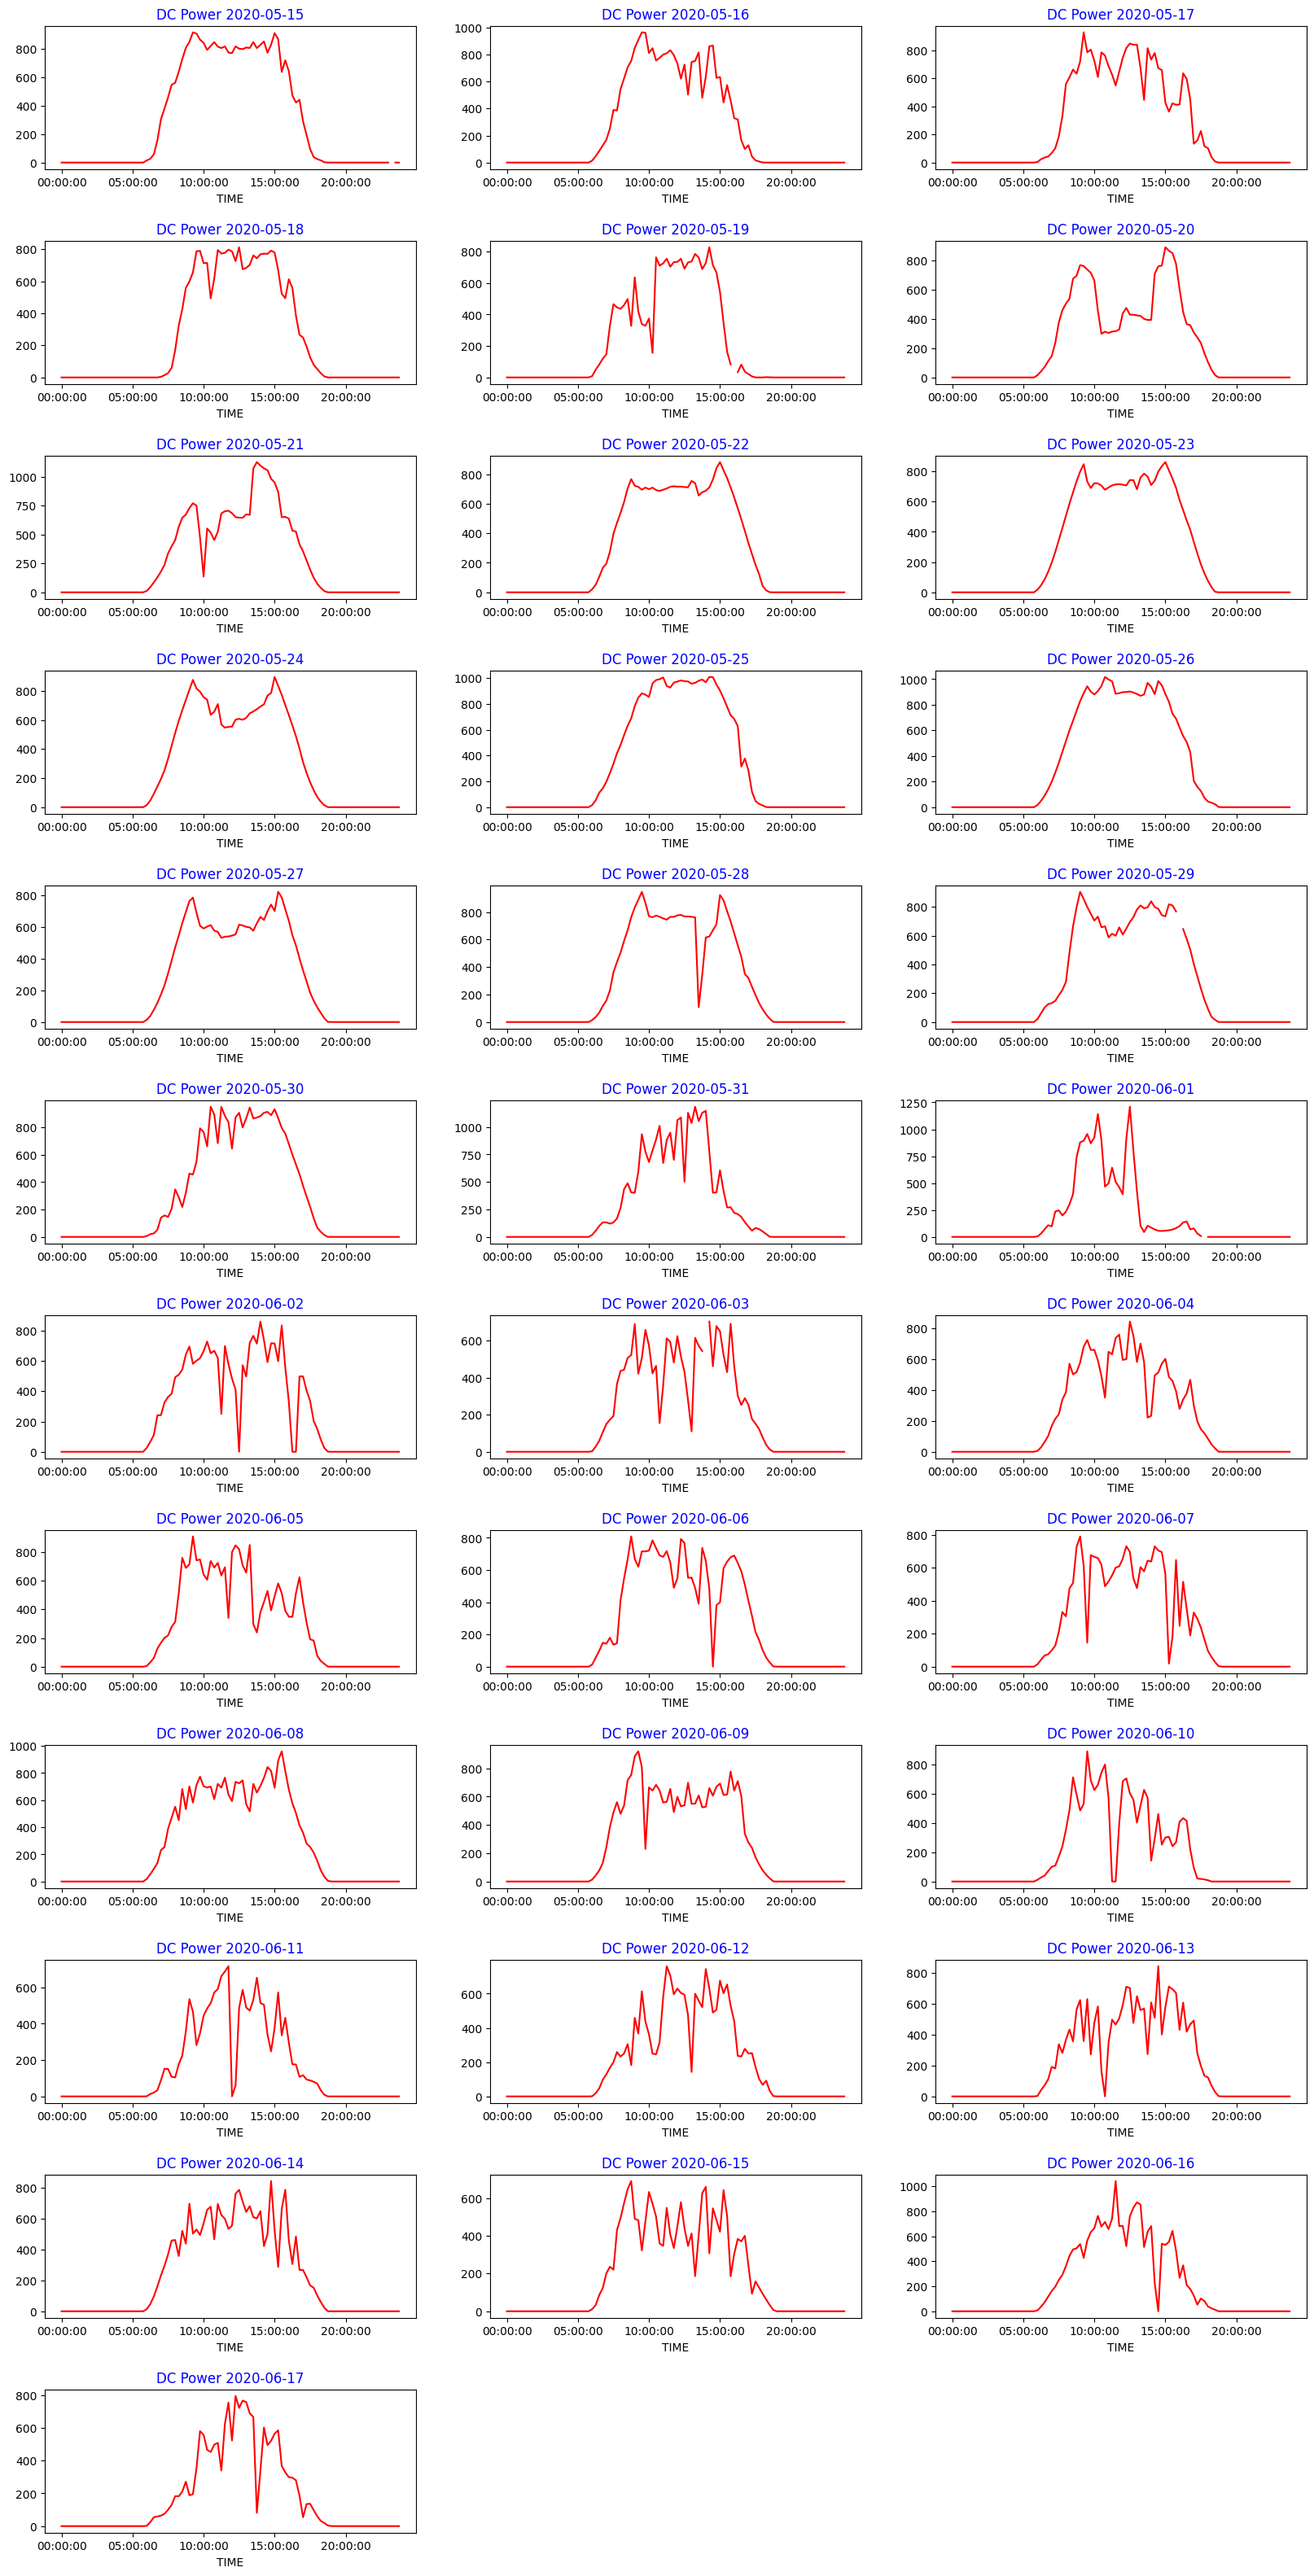

In [ ]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

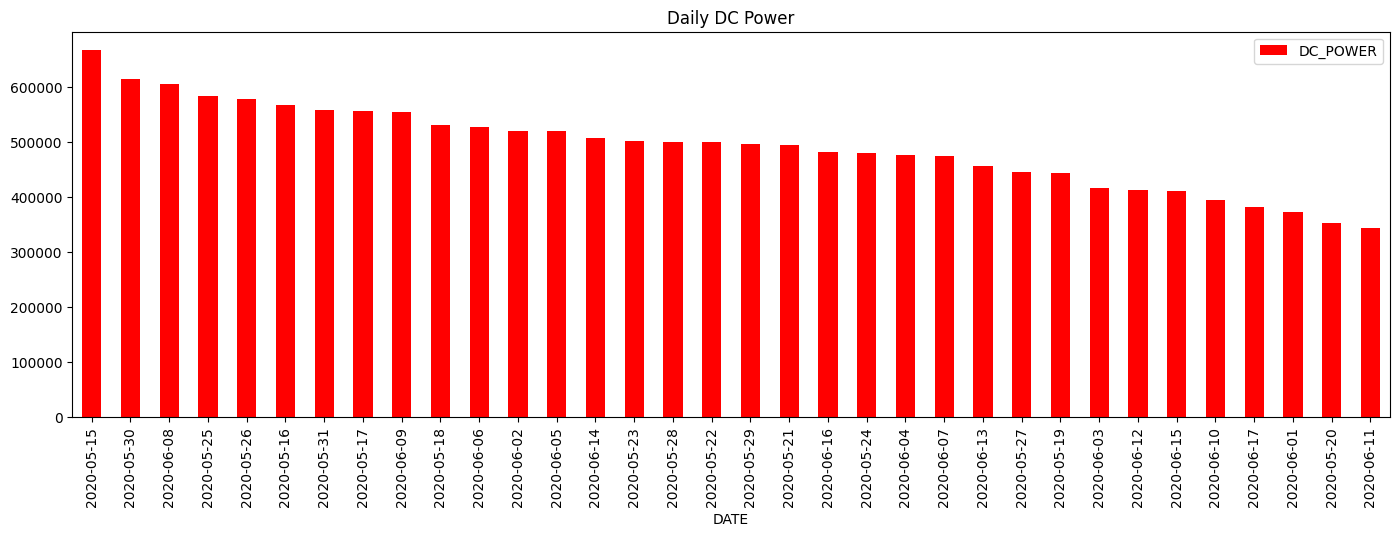

In [ ]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

###IRRADIATION generation on per day basis

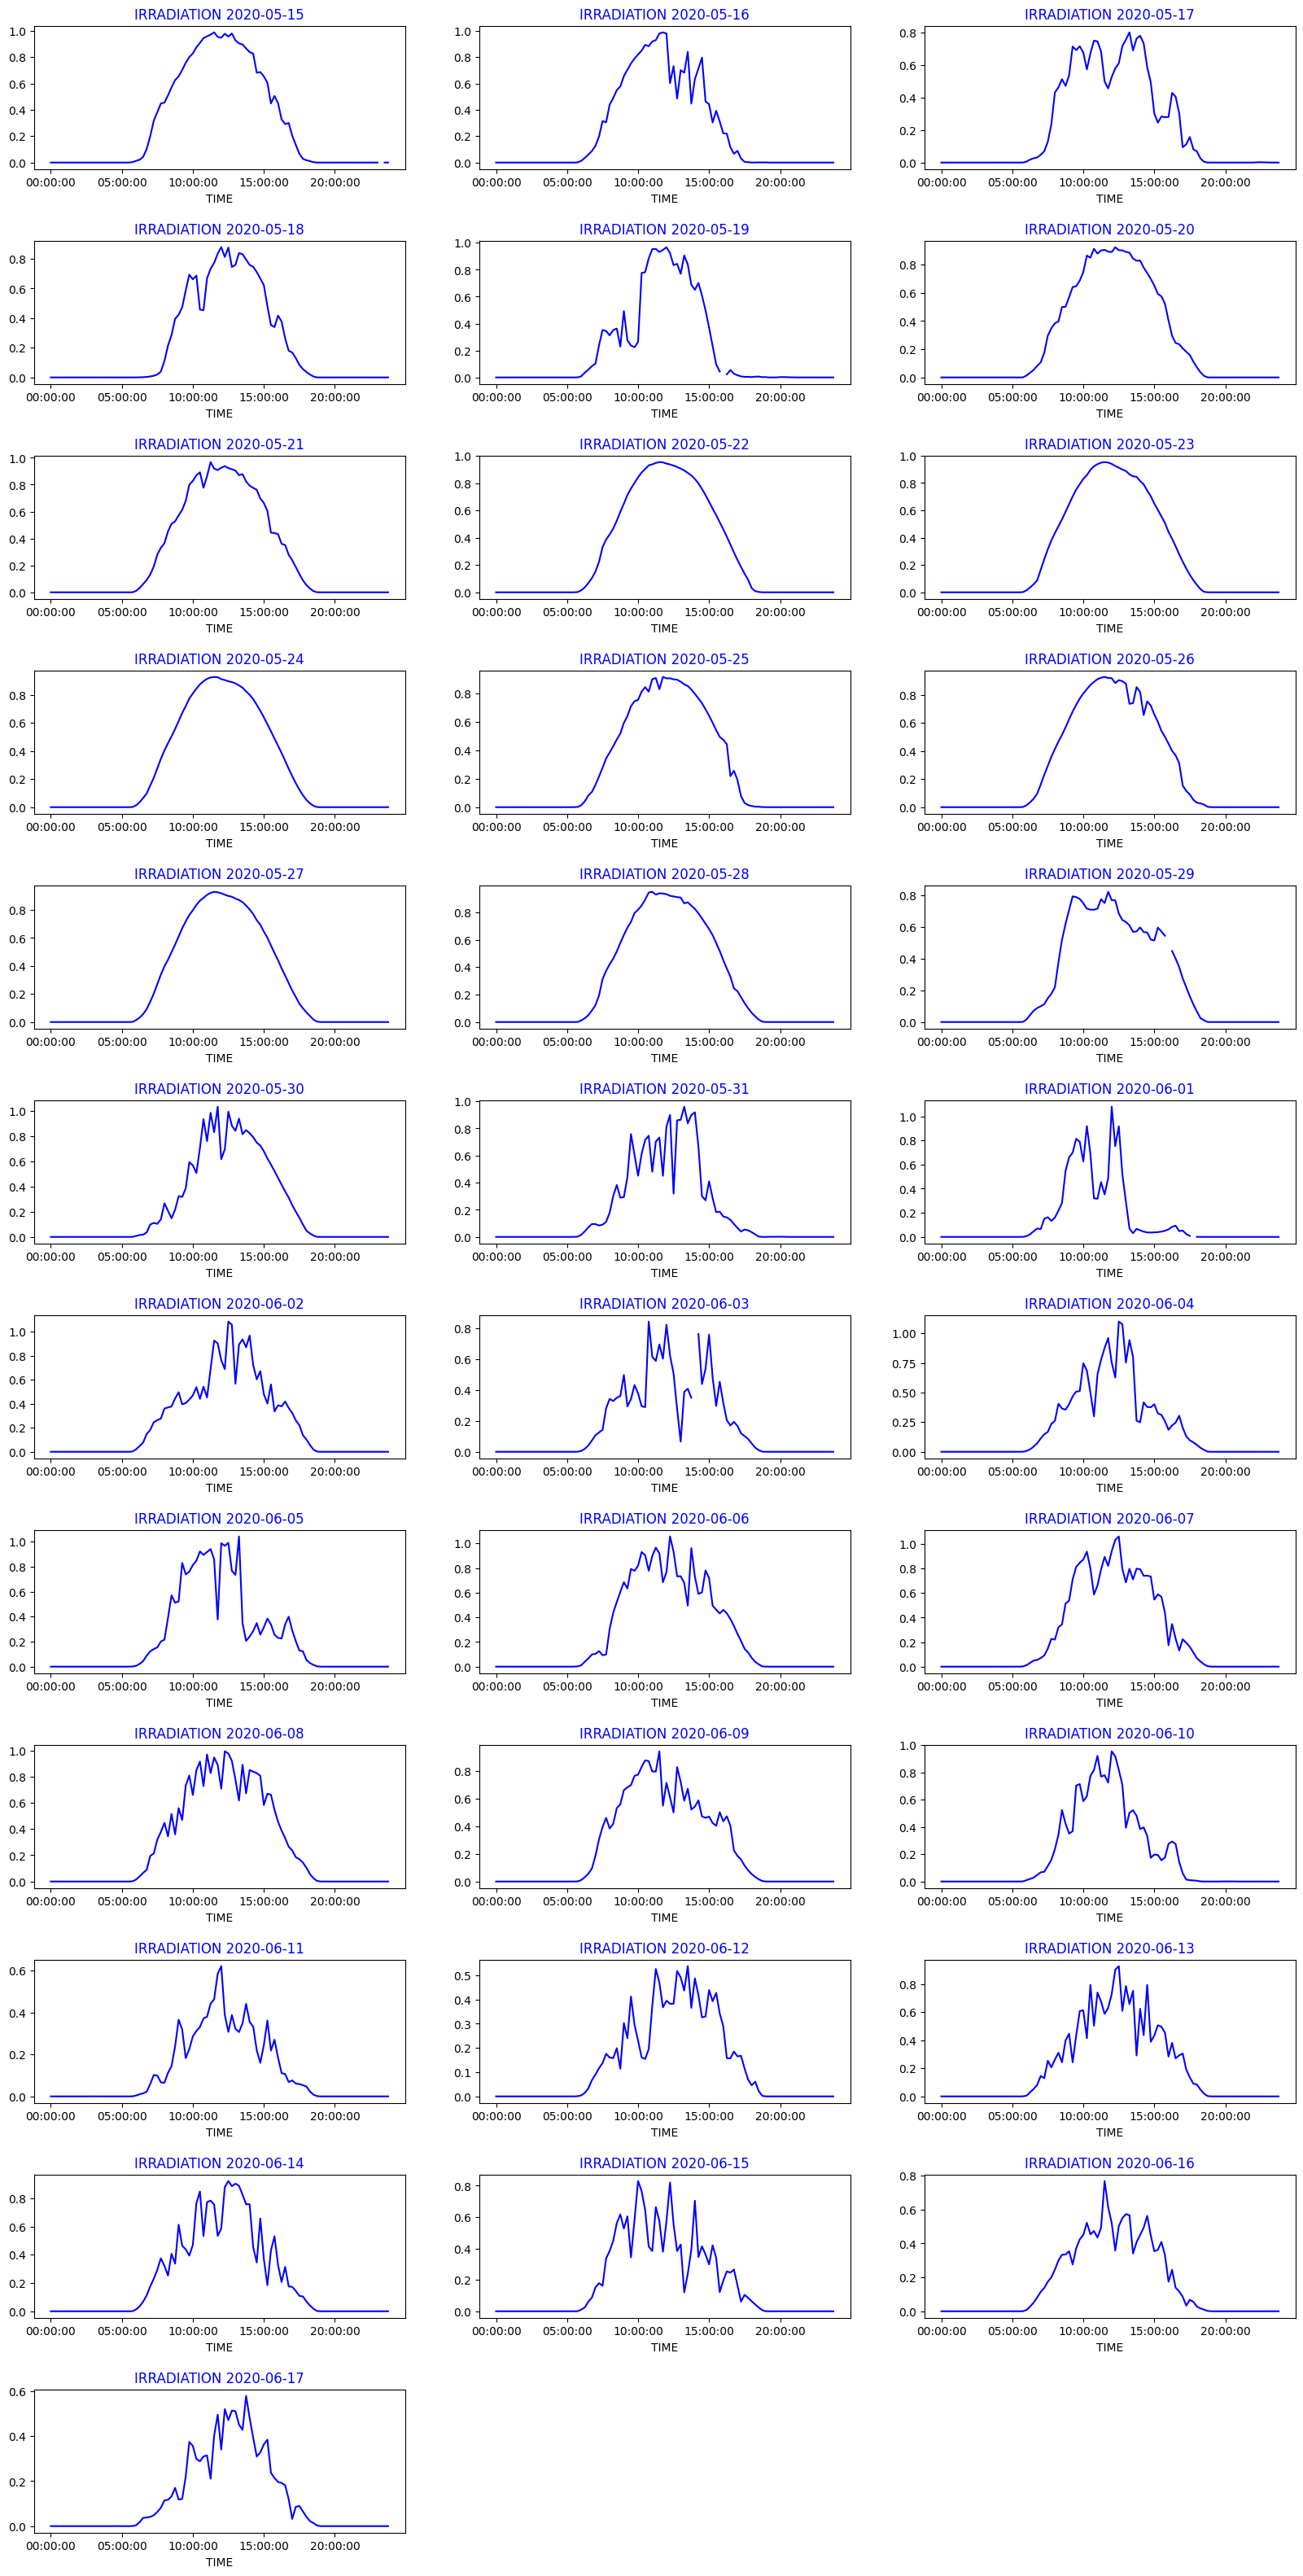

In [ ]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

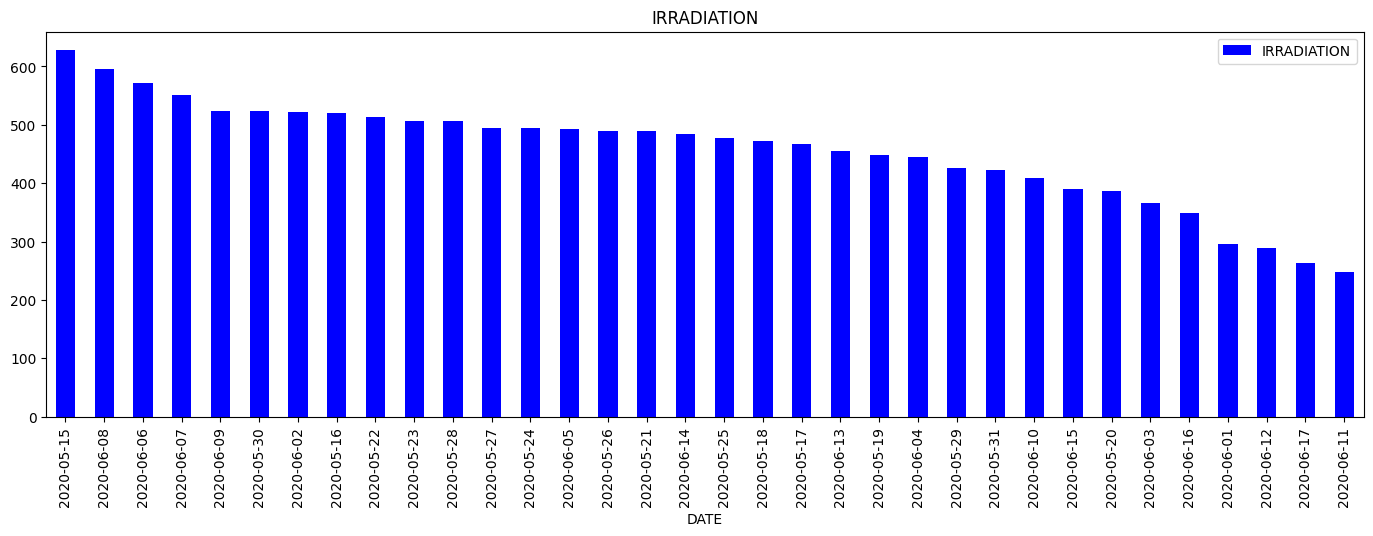

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

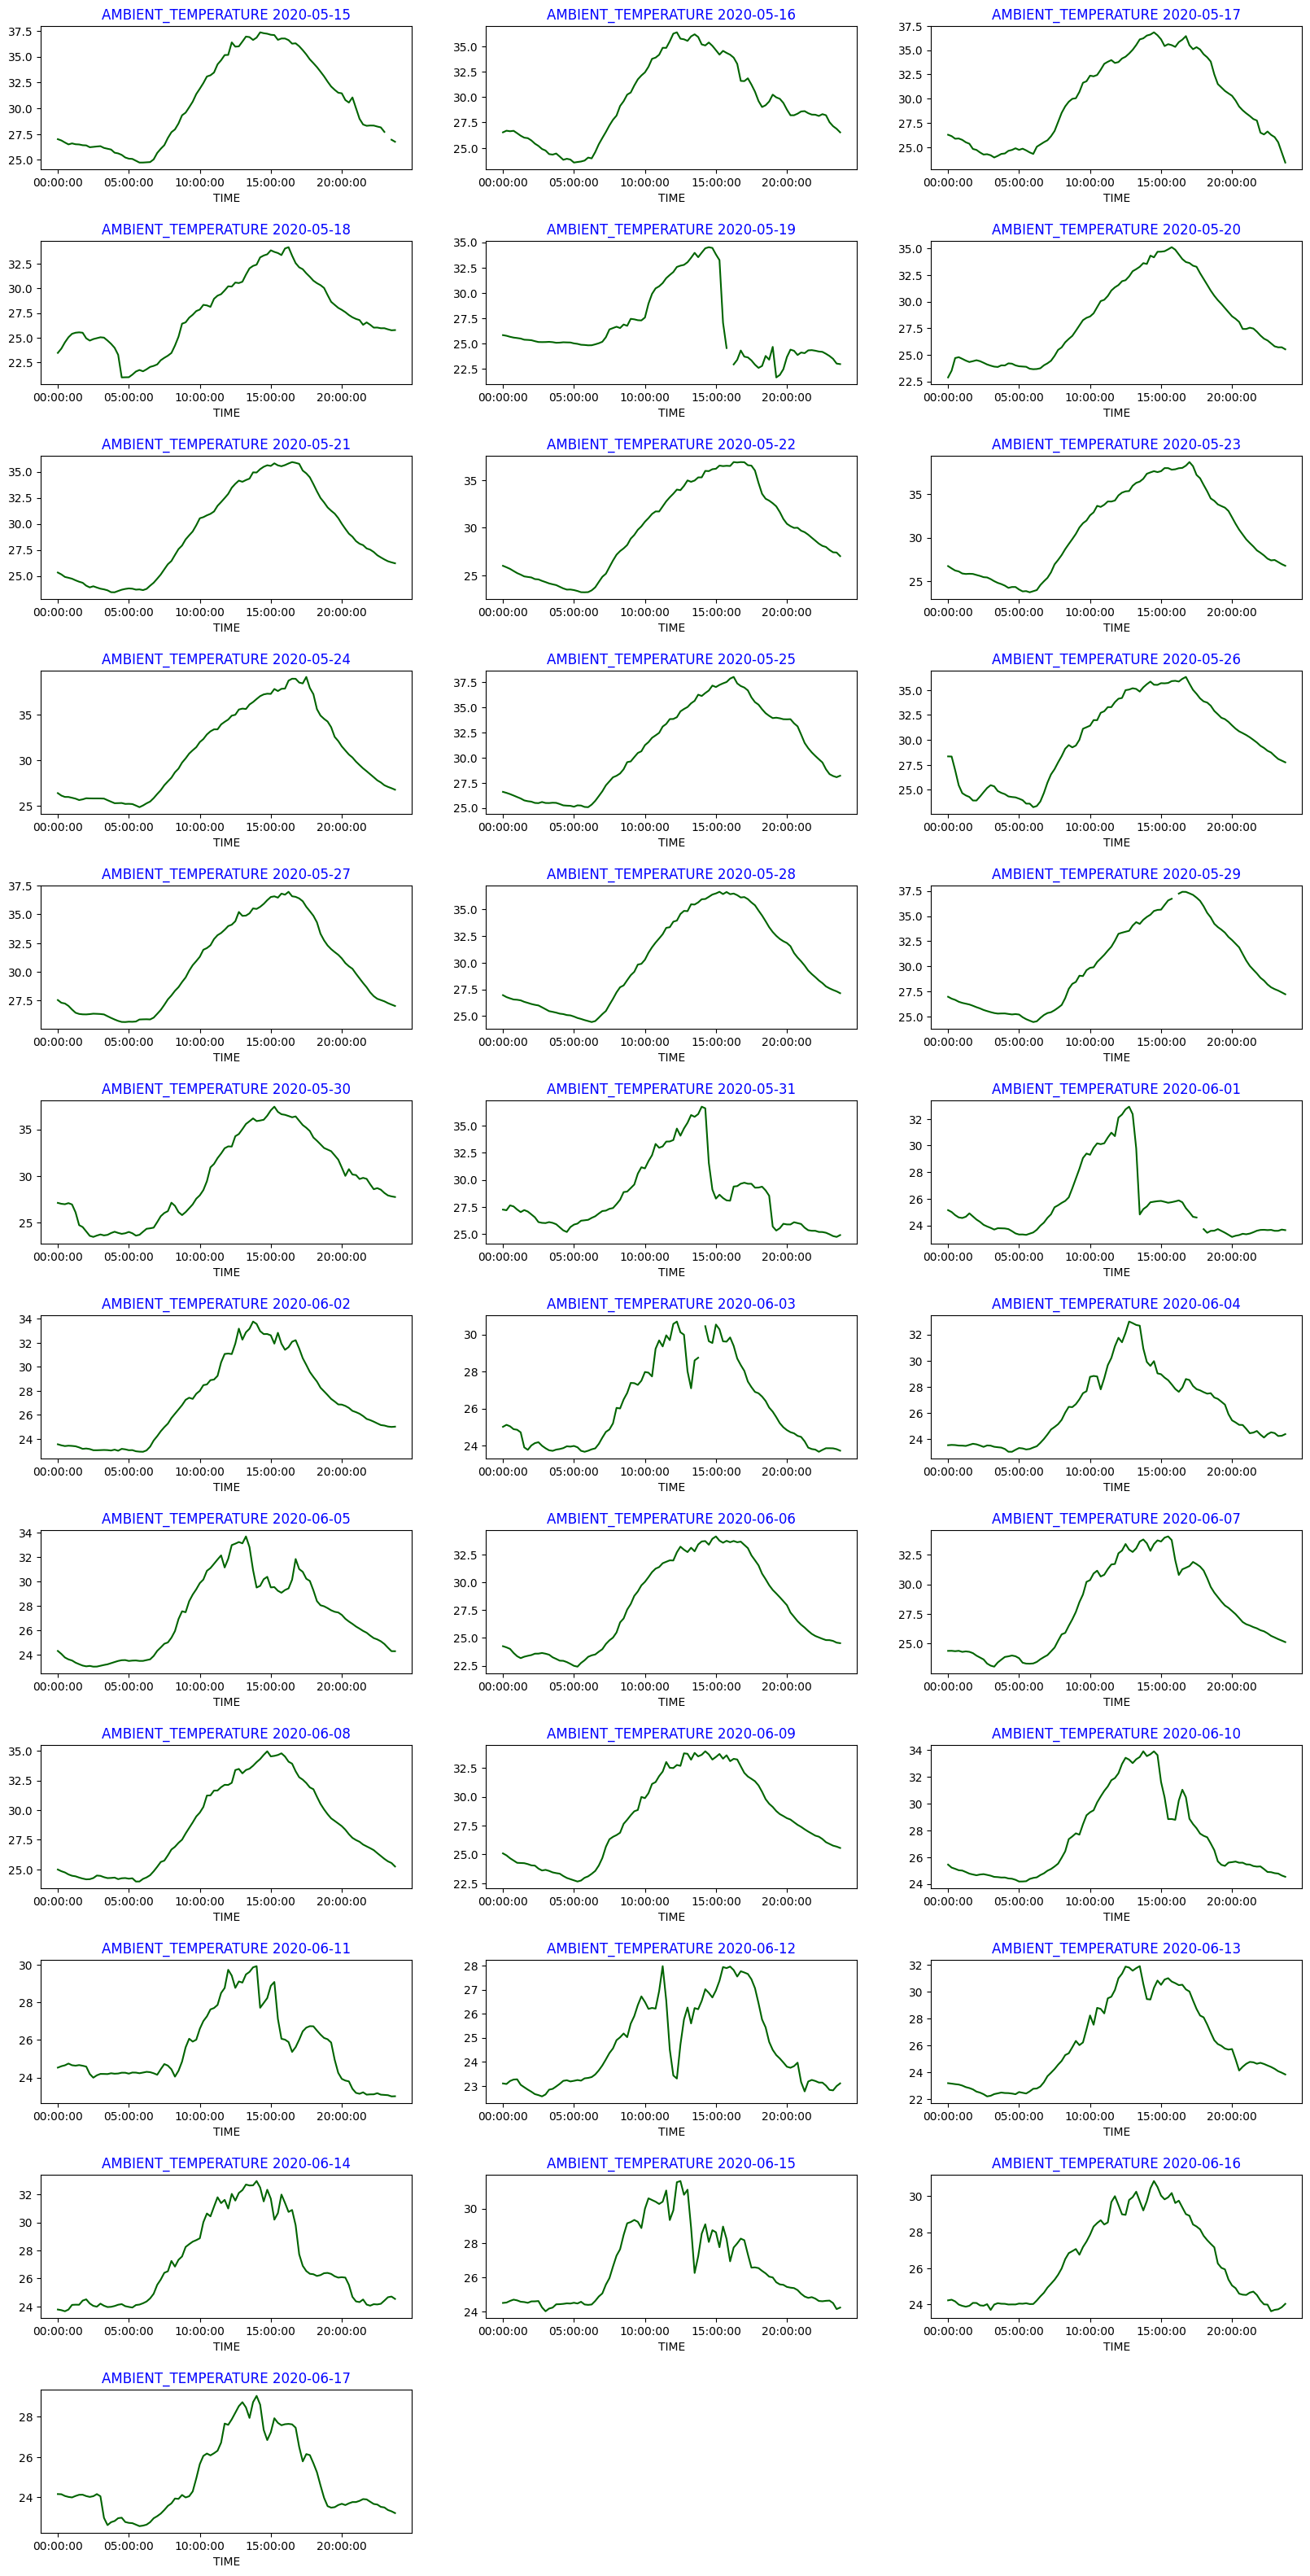

In [ ]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

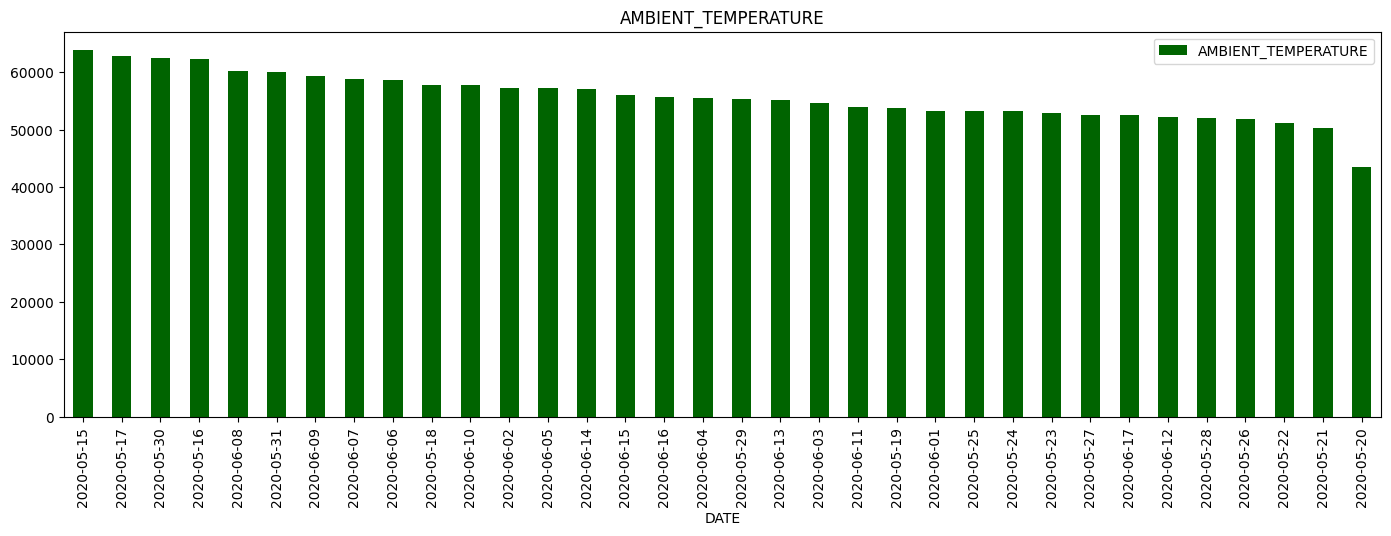

In [ ]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

## Highest average DC_POWER is generated on "2020-05-15"

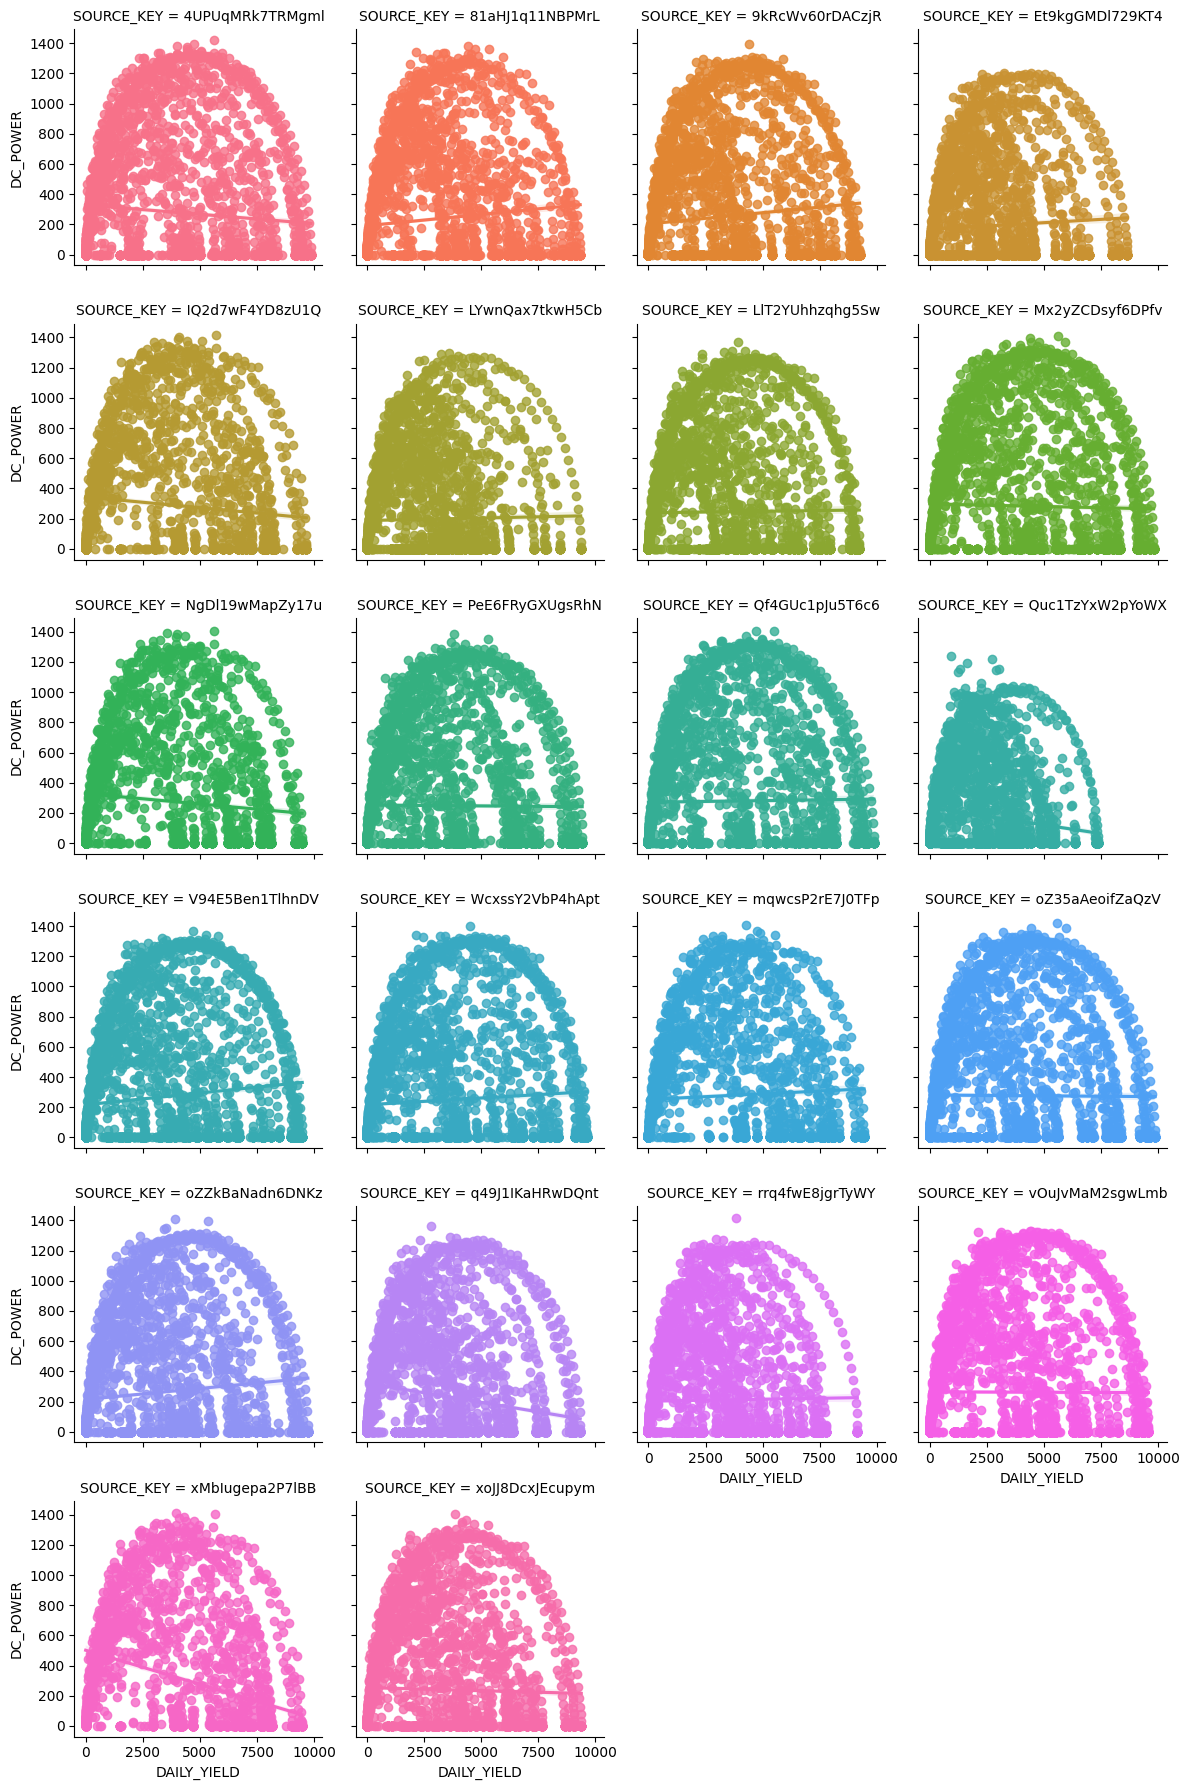

In [ ]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

### Solar Power Plant Inverter Efficiency Calculation

In [ ]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [ ]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [ ]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

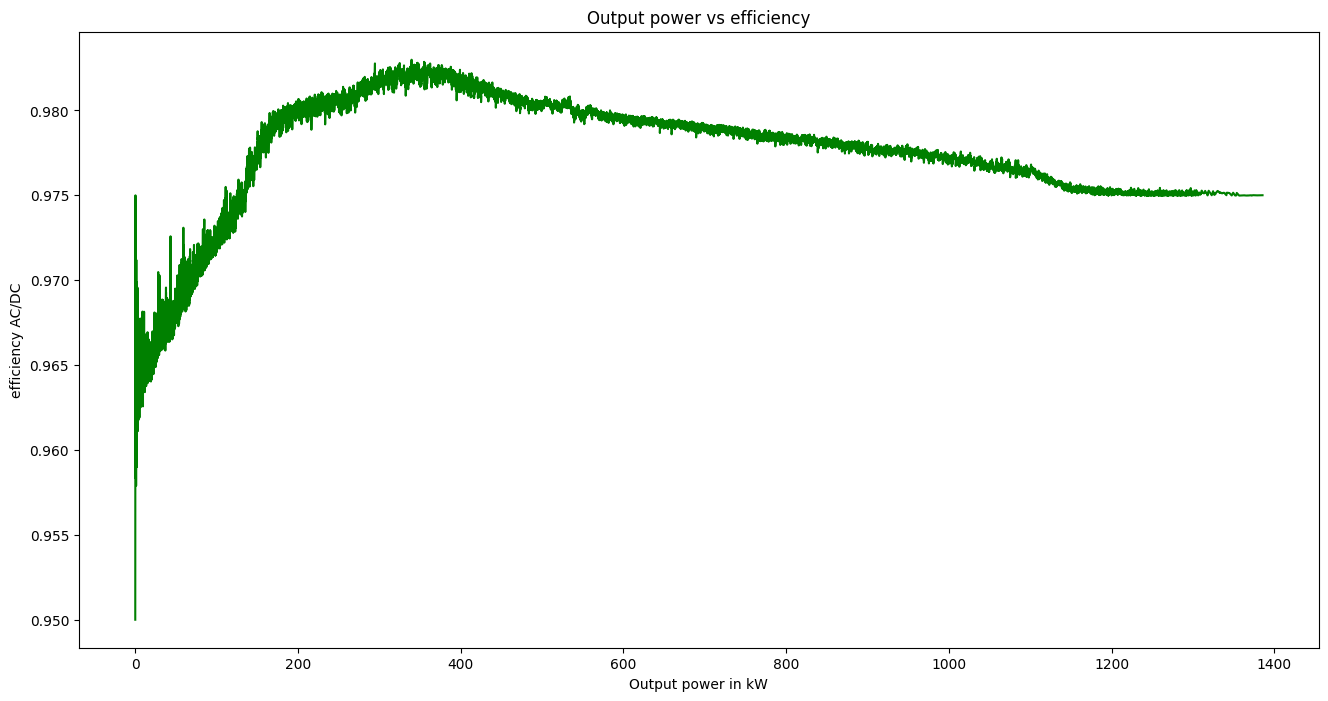

In [ ]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

### **Solar Power Prediction**

In [ ]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [ ]:
X.head()

DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  9425.000000  2.429011e+06            27.004764           25.060789   
1     0.000000  1.215279e+09            27.004764           25.060789   
2  3075.333333  2.247720e+09            27.004764           25.060789   
3   269.933333  1.704250e+06            27.004764           25.060789   
4  3177.000000  1.994153e+07            27.004764           25.060789   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

## **Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [ ]:
model_filename = 'linear_regression_model.pkl'
joblib.dump(lr_clf, model_filename)
print(f'Model saved as {model_filename}')

Model saved as linear_regression_model.pkl


In [ ]:
loaded_model = joblib.load('linear_regression_model.pkl')
coefficients = loaded_model.coef_
intercept = loaded_model.intercept_
with open('linear_regression_model.h', 'w') as f:
    f.write('#ifndef LINEAR_REGRESSION_MODEL_H\n')
    f.write('#define LINEAR_REGRESSION_MODEL_H\n\n')

    f.write('const float coefficients[] = {\n')
    f.write(', '.join([f'{coef:.8f}' for coef in coefficients]))
    f.write('\n};\n')

    f.write(f'const float intercept = {intercept:.8f};\n\n')

    f.write('#endif // LINEAR_REGRESSION_MODEL_H\n')


In [ ]:
from google.colab import files

files.download('linear_regression_model.h')

## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'RDR Model score = {score_lr:4.4f}%')

RDR Model score = 99.9994%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")


R2 Score :  100.0 %


In [ ]:
model_filename = 'random_forest_regression_model.pkl'
joblib.dump(lr_clf, model_filename)
print(f'Model saved as {model_filename}')

Model saved as random_forest_regression_model.pkl


In [ ]:
loaded_model = joblib.load('random_forest_regression_model.pkl')
coefficients = loaded_model.coef_
intercept = loaded_model.intercept_
with open('random_forest_regression_model.h', 'w') as f:
    f.write('#ifndef LINEAR_REGRESSION_MODEL_H\n')
    f.write('#define LINEAR_REGRESSION_MODEL_H\n\n')

    f.write('const float coefficients[] = {\n')
    f.write(', '.join([f'{coef:.8f}' for coef in coefficients]))
    f.write('\n};\n')

    f.write(f'const float intercept = {intercept:.8f};\n\n')

    f.write('#endif // RANDO_FOREST_REGRESSION_MODEL_H\n')

##**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


In [ ]:
model_filename = 'decision_tree_regression_model.pkl'
joblib.dump(lr_clf, model_filename)
print(f'Model saved as {model_filename}')

Model saved as decision_tree_regression_model.pkl


In [ ]:
loaded_model = joblib.load('decision_tree_regression_model.pkl')
coefficients = loaded_model.coef_
intercept = loaded_model.intercept_
with open('decision_tree_regression_model.h', 'w') as f:
    f.write('#ifndef LINEAR_REGRESSION_MODEL_H\n')
    f.write('#define LINEAR_REGRESSION_MODEL_H\n\n')

    f.write('const float coefficients[] = {\n')
    f.write(', '.join([f'{coef:.8f}' for coef in coefficients]))
    f.write('\n};\n')

    f.write(f'const float intercept = {intercept:.8f};\n\n')

    f.write('#endif // DECISION_TREE_REGRESSION_MODEL_H\n')

### **Result** **Prediction**

In [ ]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.69355714 ...    0.         1007.20419524
    0.        ]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

Actual   Predicted
40426    0.000000    0.000000
50974    0.000000    0.000000
53919  684.913333  684.693557
2384     0.000000    0.000000
22014    0.000000    0.000000

In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']

# Display the updated DataFrame
print(cross_checking.head())

           Actual   Predicted     Error
40426    0.000000    0.000000  0.000000
50974    0.000000    0.000000  0.000000
53919  684.913333  684.693557  0.219776
2384     0.000000    0.000000  0.000000
22014    0.000000    0.000000  0.000000


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

### **Time Series Analysis**

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [ ]:
gen_1=pd.read_csv('/content/gdrive/MyDrive/Prediction/Plant_1_Generation_Data.csv')
gen_1.drop('PLANT_ID',1,inplace=True)
sens_1= pd.read_csv('/content/gdrive/MyDrive/Prediction/Plant_1_Weather_Sensor_Data.csv')
sens_1.drop('PLANT_ID',1,inplace=True)

#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

**Daily** **Yield & AC-DC power**

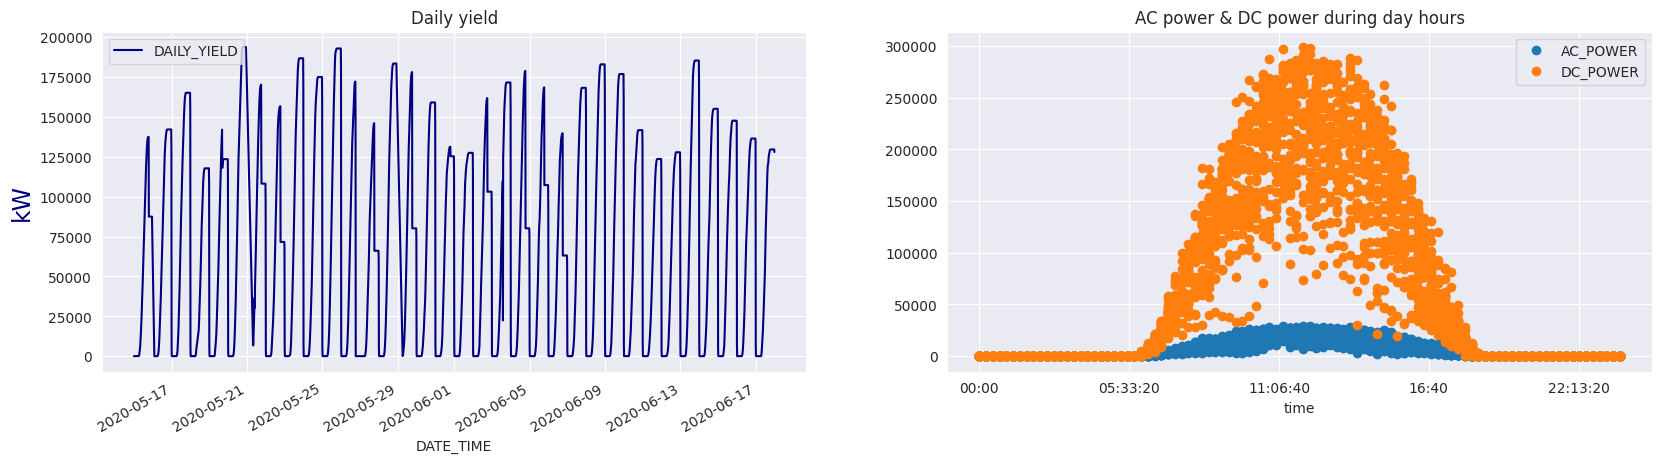

In [ ]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

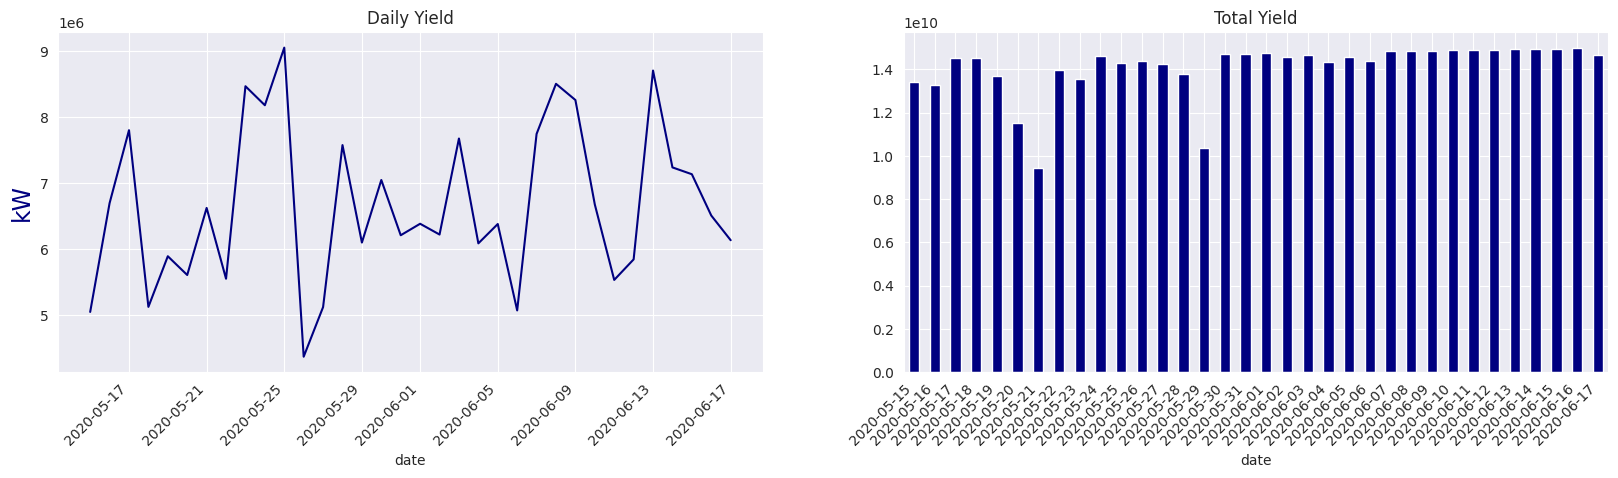

In [ ]:
daily_gen=df_gen.copy()
daily_gen['date']=daily_gen['DATE_TIME'].dt.date

daily_gen=daily_gen.groupby('date').sum()

fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
daily_gen['DAILY_YIELD'].plot(ax=ax[0],color='navy')
daily_gen['TOTAL_YIELD'].plot(kind='bar',ax=ax[1],color='navy')
fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

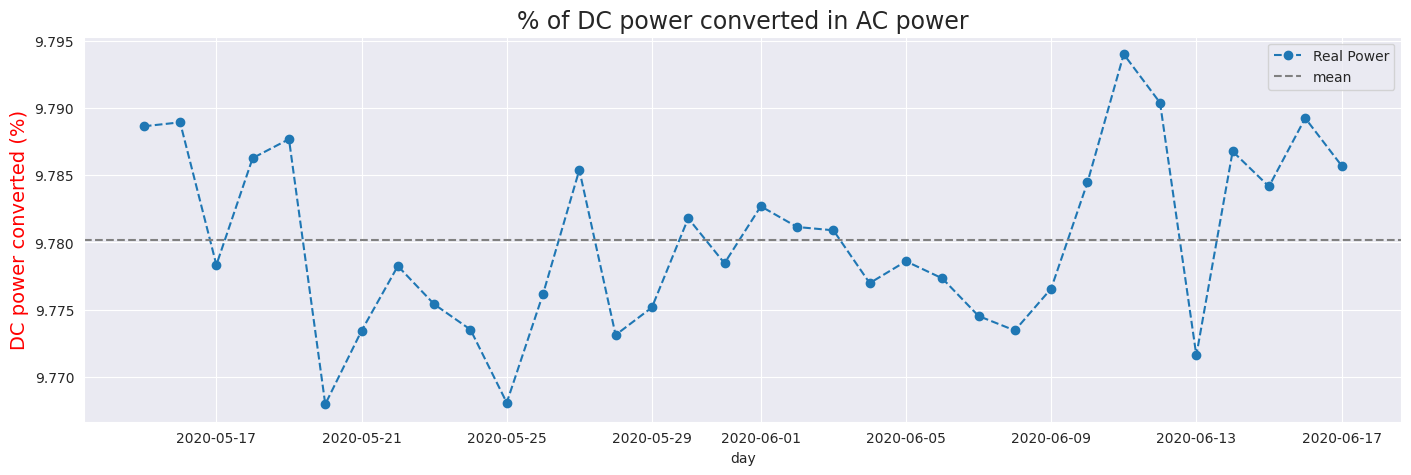

In [ ]:
# Real DC power converted
losses=gen_1.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

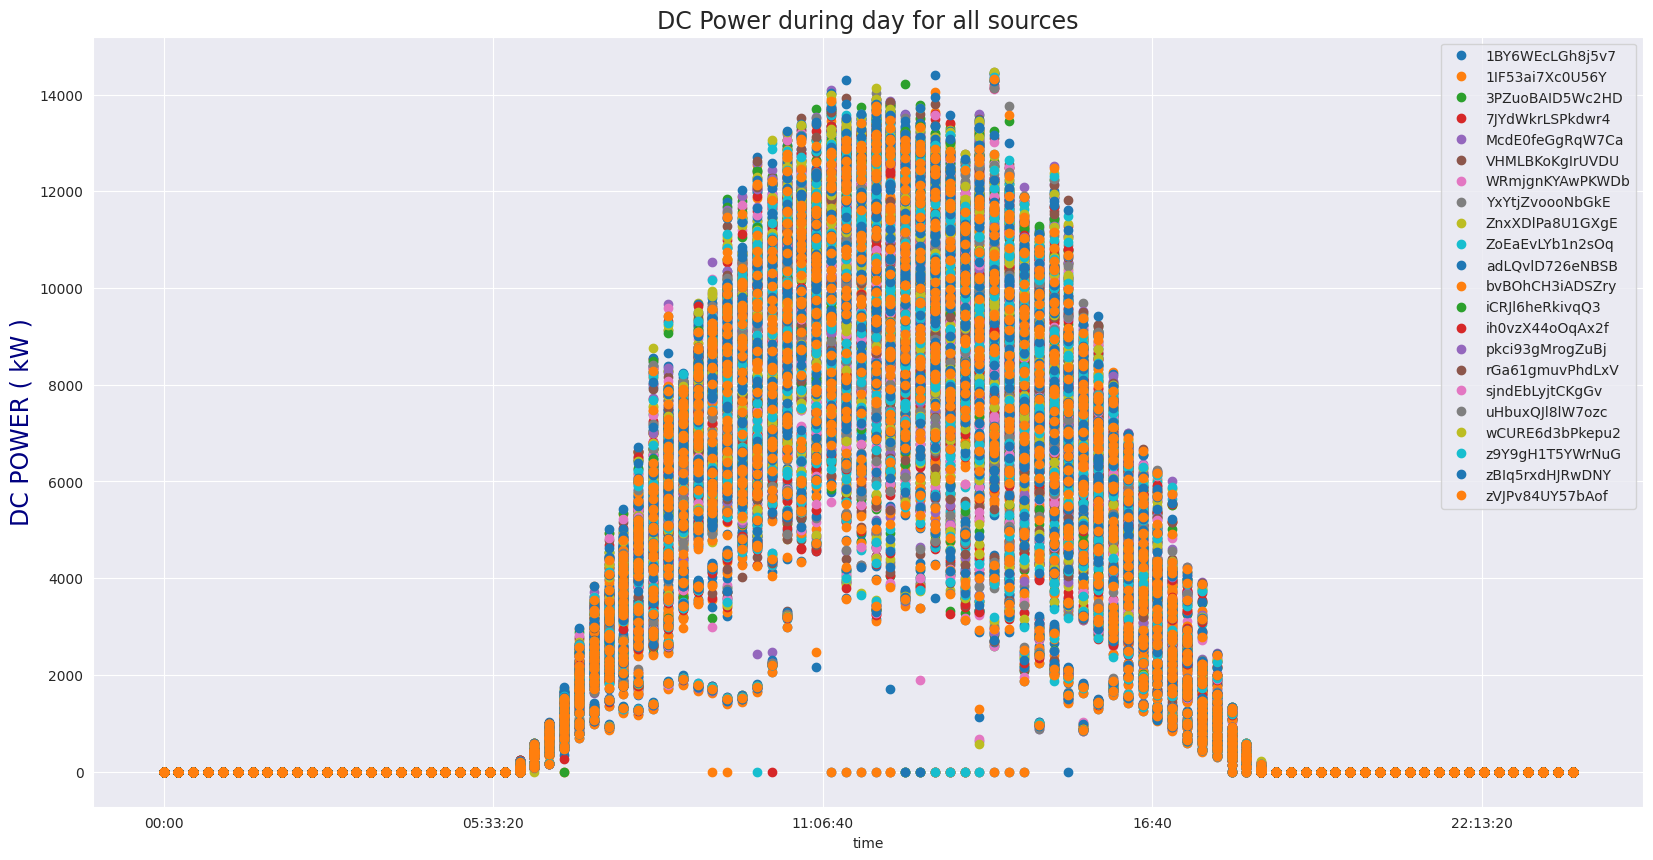

In [ ]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

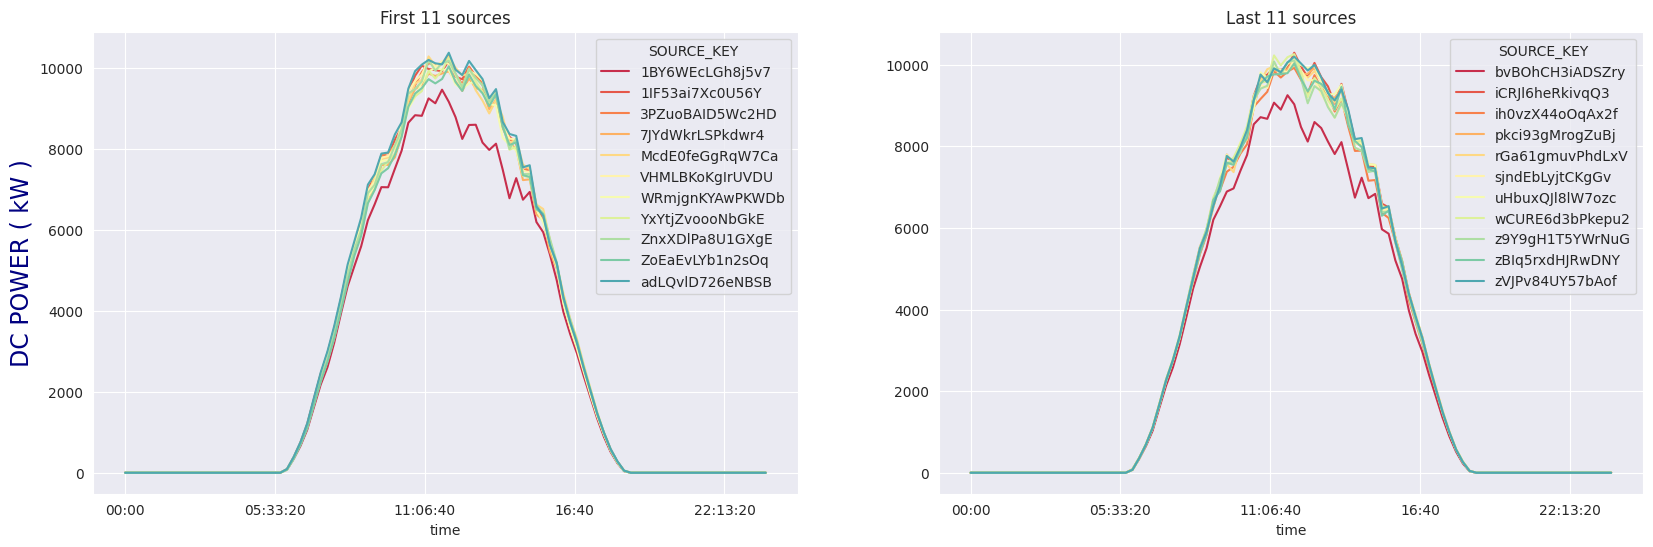

In [ ]:
dc_gen=gen_1.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

**DC power generation during day hours for all 34 days.**

In [ ]:
temp1_gen=gen_1.copy()

temp1_gen['time']=temp1_gen['DATE_TIME'].dt.time
temp1_gen['day']=temp1_gen['DATE_TIME'].dt.date


temp1_sens=sens_1.copy()

temp1_sens['time']=temp1_sens['DATE_TIME'].dt.time
temp1_sens['day']=temp1_sens['DATE_TIME'].dt.date

# just for columns
cols=temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack()

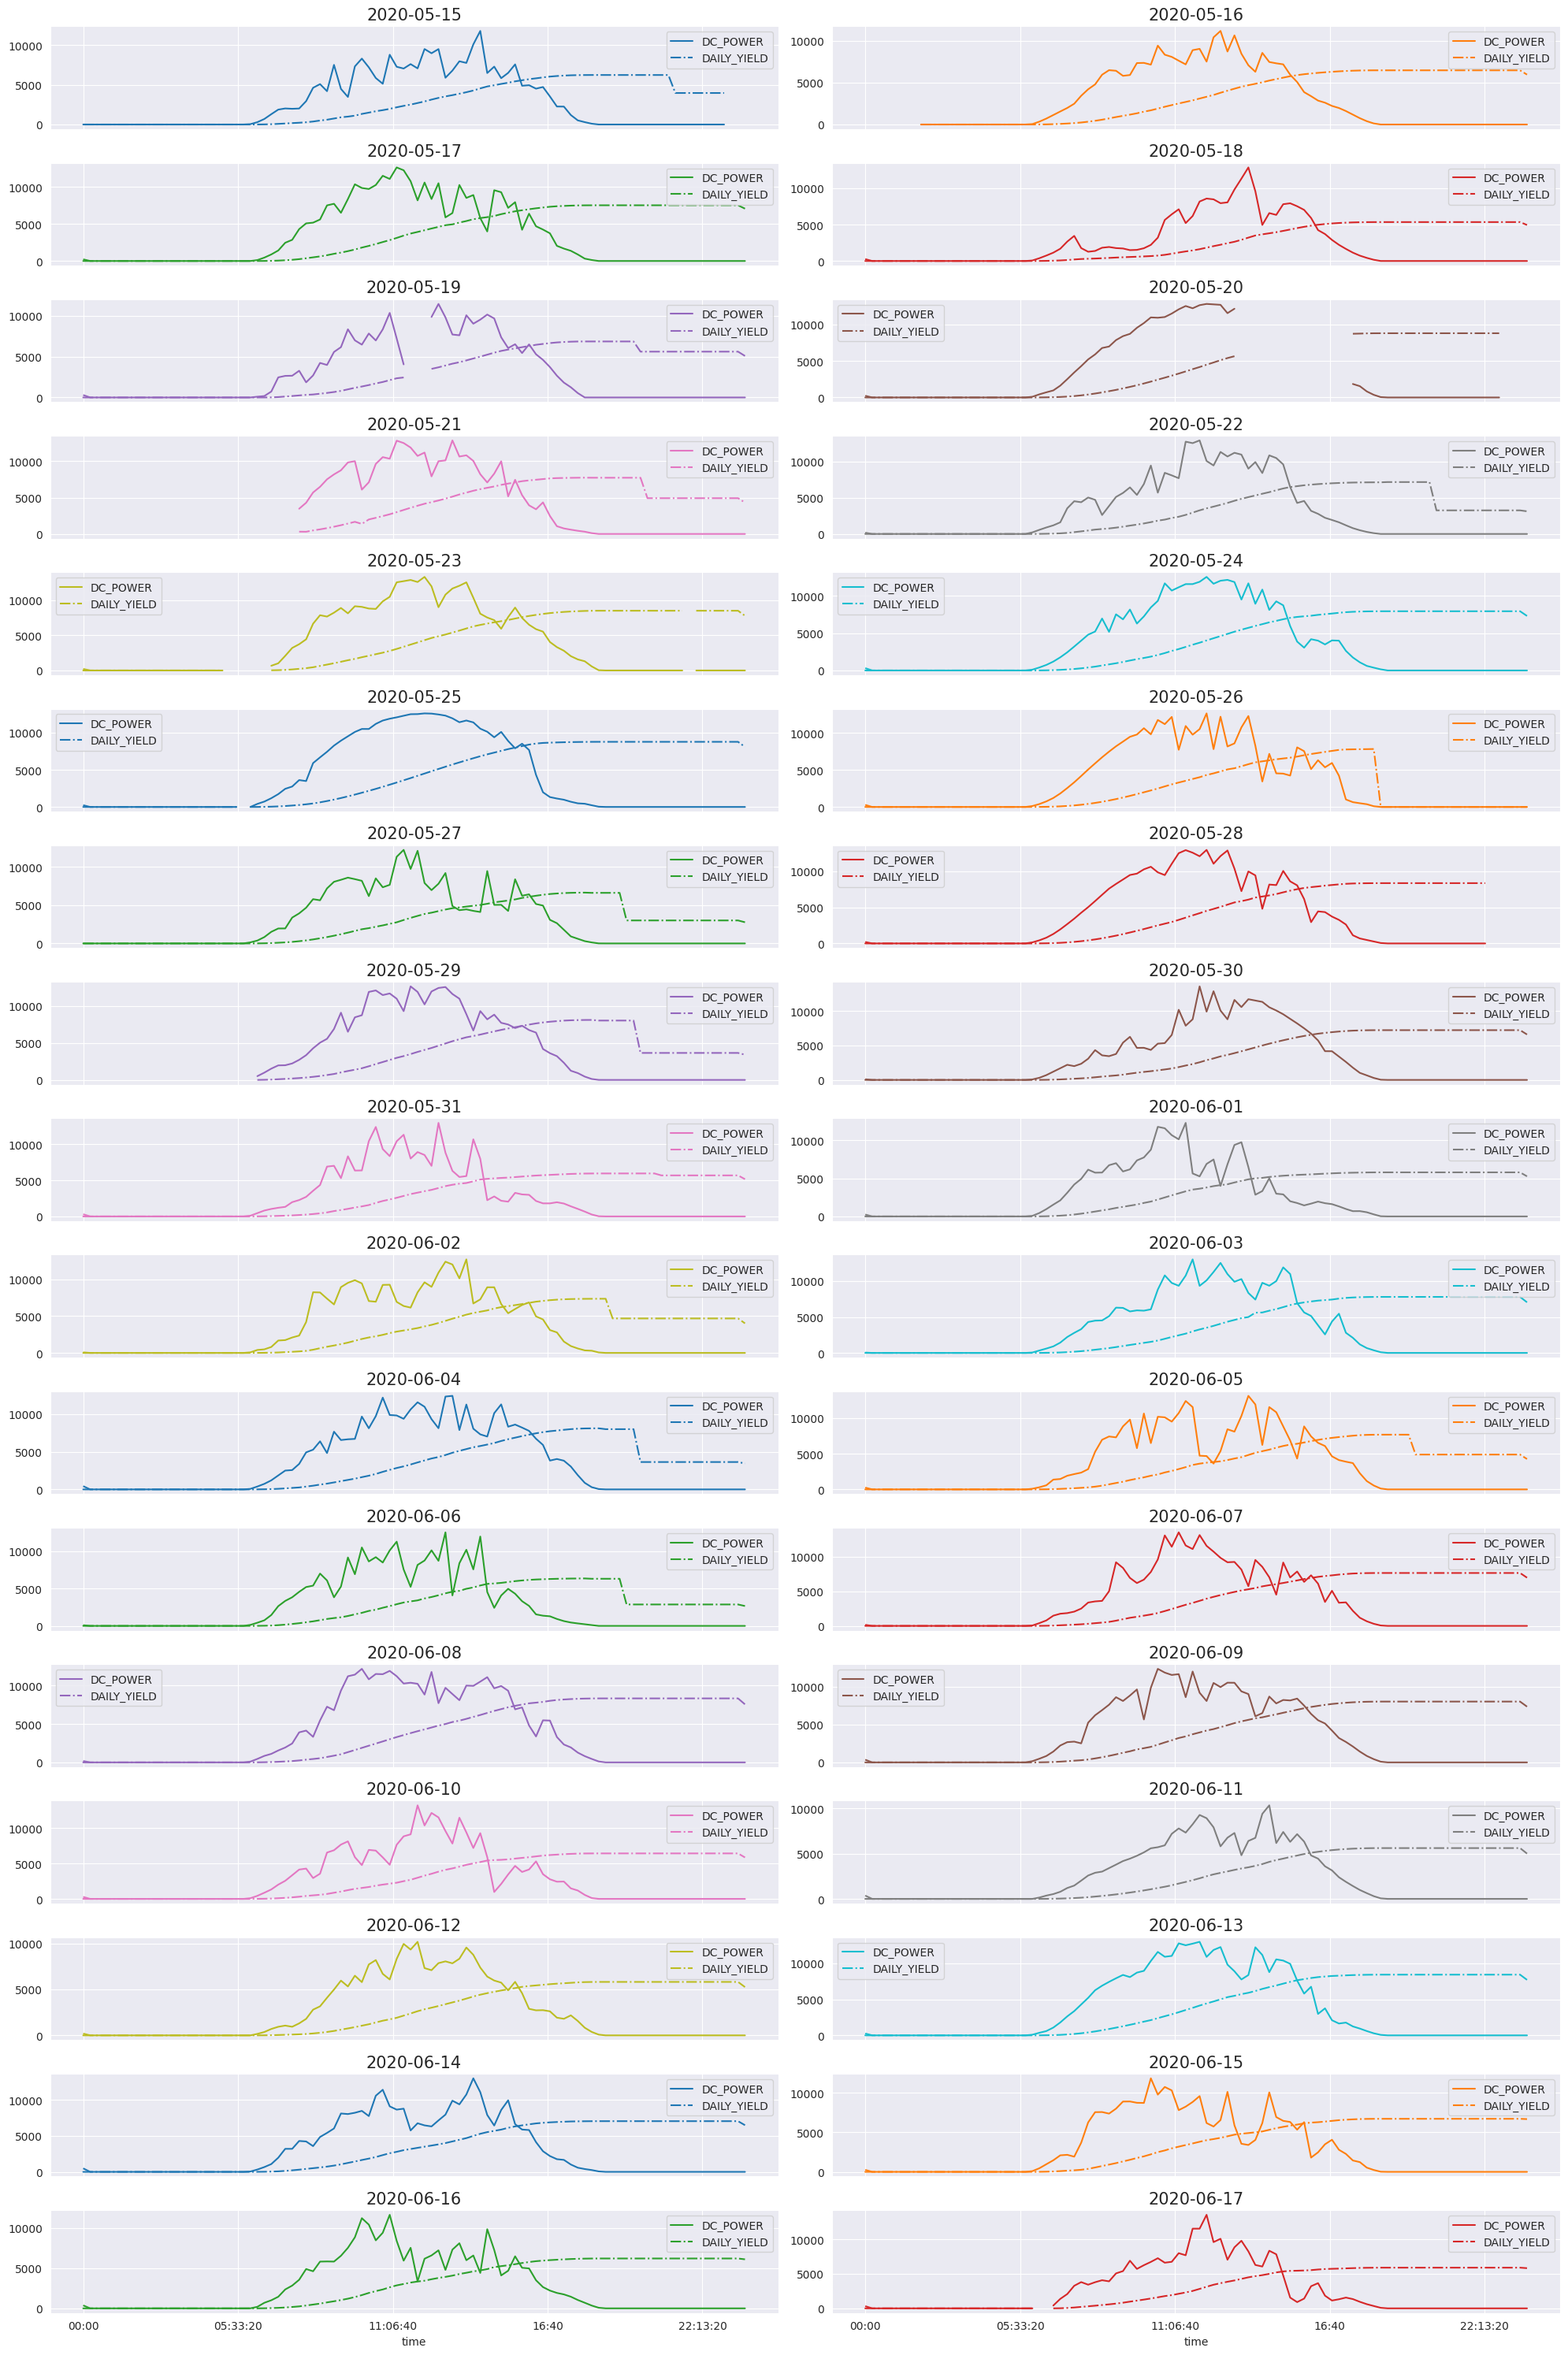

In [ ]:
ax =temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
temp1_gen.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()